In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch

In [2]:
acc_df_global = pd.DataFrame(columns=['model', 'acc', 'epoch'])
epoch_global = 70
def get_val_results_addtodata(path):
    results = []
    global acc_df_global, epoch_global
    with open(path) as text:
        for line in text:
            if 'val_acc1' in line:
                i = line.index(':', -25)
                results.append(float(line[i+2:-2]))
    dict = {'model': [path[-(path[::-1].index('/')):(-(path[::-1].index('.'))-1)]], 
            'acc': [results[epoch_global-1]], 
            'epoch': [epoch_global]}
    df = pd.DataFrame(dict)
    acc_df_global = pd.concat([acc_df_global, df], ignore_index = True)
    return results

def vis(acc_list, name_list, title='Validation Accuracy Comparison'):
    plt.style.use('seaborn-darkgrid')
    dpi = 96
    plt.figure(figsize=(500/dpi, 500/dpi), dpi=dpi)
    palette = plt.get_cmap('Set1')

    for i in range(len(acc_list)):
        plt.plot(acc_list[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
        plt.text(len(acc_list[i]), acc_list[i][-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

    plt.title(title, loc='left', fontsize=15, fontweight=0, color='black')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.show()

def get_mean_std_at_epoch(*accuracies, epoch):
    acc_list = []
    for acc in accuracies:
        acc_list.append(acc[epoch-1])
    return np.mean(acc_list), np.std(acc_list)



In [3]:
acc_data = pd.DataFrame(columns=['model', 'acc', 'epoch'])
#validation results from -b 256 --epochs 90 --wd 0.001 --lr 0.0001 --rs53 datasplit 8:2
L3_rs53 = get_val_results_addtodata('./rs53_new/3L.txt')
L3eidiv_rs53 = get_val_results_addtodata('./rs53_new/3Leidiv.txt')
L5_rs53 = get_val_results_addtodata('./rs53_new/5L.txt')
L5eidiv_rs53 = get_val_results_addtodata('./rs53_new/5Leidiv.txt')
L7_rs53 = get_val_results_addtodata('./rs53_new/7L.txt')
L7eidiv_rs53 = get_val_results_addtodata('./rs53_new/7Leidiv.txt')

#validation results from -b 256 --epochs 90 --wd 0.001 --lr 0.0001 --rs77 datasplit 8:2
L3_rs77 = get_val_results_addtodata('./rs77_new/3L.txt')
L3eidiv_rs77 = get_val_results_addtodata('./rs77_new/3Leidiv.txt')
L5_rs77 = get_val_results_addtodata('./rs77_new/5L.txt')
L5eidiv_rs77 = get_val_results_addtodata('./rs77_new/5Leidiv.txt')
#L5eidiv_rs77_alt = get_val_results_addtodata('./rs77_new/5Leidiv_alt.txt')
L7_rs77 = get_val_results_addtodata('./rs77_new/7L.txt')
L7eidiv_rs77 = get_val_results_addtodata('./rs77_new/7Leidiv.txt')

#validation results from -b 256 --epochs 90 --wd 0.001 --lr 0.0001 --rs191 datasplit 8:2
L3_rs191 = get_val_results_addtodata('./rs191/3L.txt')
L3eidiv_rs191 = get_val_results_addtodata('./rs191/3Leidiv.txt')
L5_rs191 = get_val_results_addtodata('./rs191/5L.txt')
L5eidiv_rs191 = get_val_results_addtodata('./rs191/5Leidiv.txt')
L7_rs191 = get_val_results_addtodata('./rs191/7L.txt')
L7eidiv_rs191 = get_val_results_addtodata('./rs191/7Leidiv.txt')

In [4]:
#get mean from each model
L3_mean, L3_std = get_mean_std_at_epoch(L3_rs53, L3_rs77, L3_rs191, epoch=epoch_global)
L3eidiv_mean, L3eidiv_std = get_mean_std_at_epoch(L3eidiv_rs53, L3eidiv_rs77, L3eidiv_rs191, epoch=epoch_global)
L5_mean, L5_std = get_mean_std_at_epoch(L5_rs53, L5_rs77, L5_rs191, epoch=epoch_global)
L5eidiv_mean, L5eidiv_std = get_mean_std_at_epoch(L5eidiv_rs53, L5eidiv_rs77, L5eidiv_rs191, epoch=epoch_global)
L7_mean, L7_std = get_mean_std_at_epoch(L7_rs53, L7_rs77, L7_rs191, epoch=epoch_global)
L7eidiv_mean, L7eidiv_std = get_mean_std_at_epoch(L7eidiv_rs53, L7eidiv_rs77, L7eidiv_rs191, epoch=epoch_global)

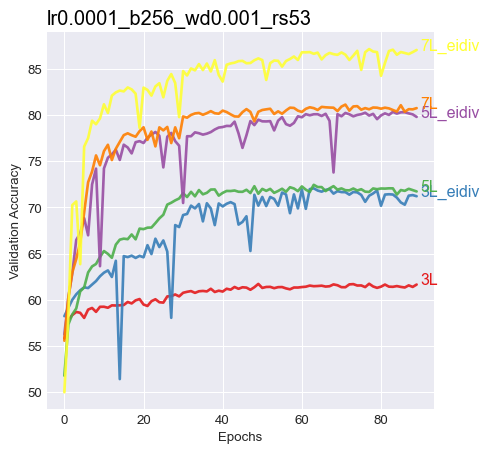

In [5]:
acc_list = np.array([L3_rs53, L3eidiv_rs53, L5_rs53, L5eidiv_rs53, L7_rs53, L7eidiv_rs53], dtype=object)
name_list = np.array(['3L', '3L_eidiv', '5L', '5L_eidiv', '7L', '7L_eidiv'])
vis(acc_list, name_list, 'lr0.0001_b256_wd0.001_rs53')

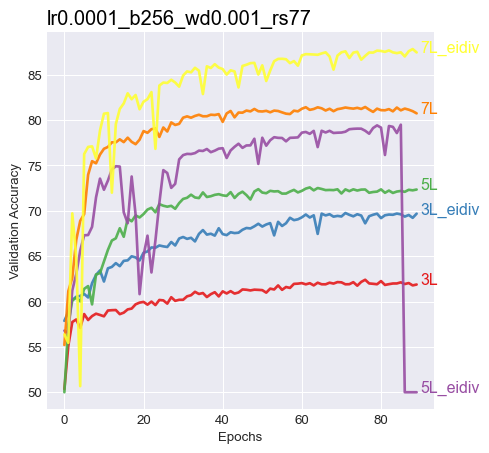

In [6]:
acc_list = np.array([L3_rs77, L3eidiv_rs77, L5_rs77, L5eidiv_rs77, L7_rs77, L7eidiv_rs77], dtype=object)
name_list = np.array(['3L', '3L_eidiv', '5L', '5L_eidiv', '7L', '7L_eidiv'])
vis(acc_list, name_list, 'lr0.0001_b256_wd0.001_rs77')

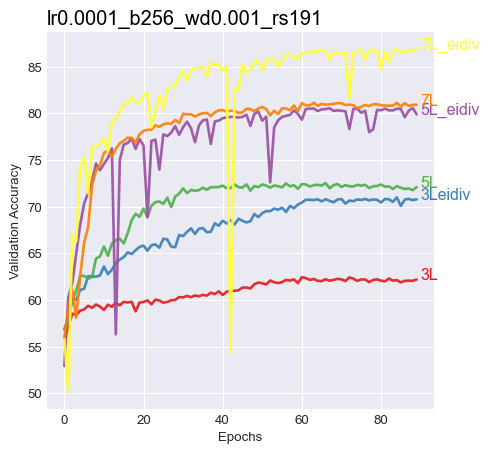

In [7]:
acc_list = np.array([L3_rs191, L3eidiv_rs191, L5_rs191, L5eidiv_rs191, L7_rs191, L7eidiv_rs191], dtype=object)
name_list = np.array(['3L', '3Leidiv', '5L', '5L_eidiv', '7L', '7L_eidiv'])
vis(acc_list, name_list, 'lr0.0001_b256_wd0.001_rs191')

Text(0.5, 1.0, 'Comparing accuracy on MarkedLong')

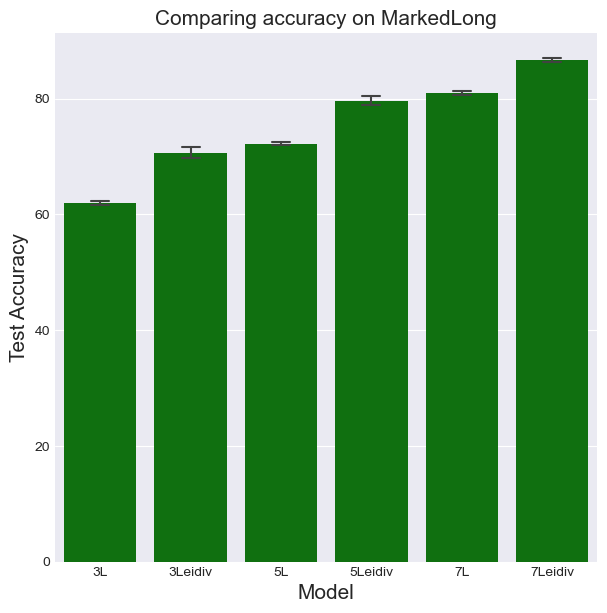

In [8]:
dpi = 100
plt.figure(figsize=(700/dpi, 700/dpi), dpi=dpi)
ax = sns.barplot(x='model', y='acc', data=acc_df_global, 
                ci='sd', capsize=.2, errwidth=1.5, color='green')
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('Test Accuracy', fontsize=15)
ax.set_title('Comparing accuracy on MarkedLong', fontsize=15)


In [9]:
#calculate the weight count for each model
def count_weight(path):
    stats = torch.load(path, map_location=torch.device('cpu'))
    weight_count = 0
    for key, value in stats['model'].items():
        if key[-(key[::-1].index('.')):] == 'weight':
            weight_count += np.prod(value.shape)
    return weight_count

L3_weight_count = count_weight('./rs191/pth/3L.pth')
L3eidiv_weight_count = count_weight('./rs191/pth/3Leidiv.pth')
L5_weight_count = count_weight('./rs191/pth/5L.pth')
L5eidiv_weight_count = count_weight('./rs191/pth/5Leidiv.pth')
L7_weight_count = count_weight('./rs191/pth/7L.pth')
L7eidiv_weight_count = count_weight('./rs191/pth/7Leidiv.pth')

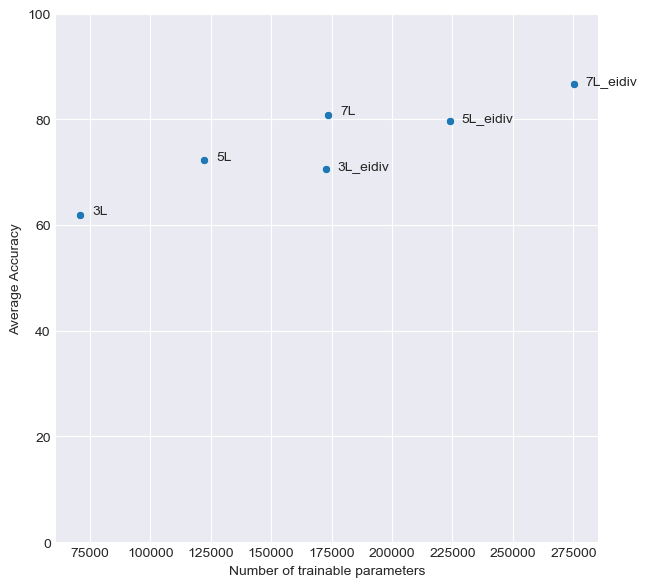

In [10]:
weight_count_list = [L3_weight_count, L3eidiv_weight_count, L5_weight_count, L5eidiv_weight_count, L7_weight_count, L7eidiv_weight_count]
mean_acc_list = [L3_mean, L3eidiv_mean, L5_mean, L5eidiv_mean, L7_mean, L7eidiv_mean]
name_list = ['3L', '3L_eidiv', '5L', '5L_eidiv', '7L', '7L_eidiv', ]

dpi = 100
fig, ax = plt.subplots(figsize=(700/dpi, 700/dpi), dpi=dpi) 
ax = sns.scatterplot(x=weight_count_list, y=mean_acc_list)

for i in range(len(name_list)):
    ax.text(weight_count_list[i]+5000, mean_acc_list[i], name_list[i])

ax.set_xlabel('Number of trainable parameters')
ax.set_ylabel('Average Accuracy')
ax.set_ybound(0,100)